# Heart Disease Predictor

### Life cycle of Machine earning project
- Understand Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-processing
- Model Training
- Choose best model
- Tune model

## 1) Problem statement
- This project understandss how heart disease is affected by variables such as sex, health, physical activity, sleep, mental health, physical health, what state they live in and many more.
## 2) Data Collection
- Dataset Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data
- The data I will be using is from 2022 containing 40 columns and 445,132 rows.

## 2.1 Import Data and Required packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/heart_2022_with_nans.csv')
print(df.shape)
df.head()

#move and rename column
move_col = df.pop("HadHeartAttack")
df['HasHeartDisease'] = move_col

df.head()


(445132, 40)


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HasHeartDisease
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,63.50,25.61,No,No,No,No,NaN,No,Yes,No
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,No


## 3 Data Checks to perform
- Check missing values
- Check for duplicates
- Check number of unique values in each column
- Check data types
- Check statistics of dataset
- Check various categories present in the different categrical column

## 3.1 Check msising values

In [4]:
#display percentage of NaNs in columns
for column in df.columns:
    percentage = df[column].isnull().mean()
    print(column + ": " + str(round(percentage*100,2)))

State: 0.0
Sex: 0.0
GeneralHealth: 0.27
PhysicalHealthDays: 2.45
MentalHealthDays: 2.04
LastCheckupTime: 1.87
PhysicalActivities: 0.25
SleepHours: 1.23
RemovedTeeth: 2.55
HadAngina: 0.99
HadStroke: 0.35
HadAsthma: 0.4
HadSkinCancer: 0.71
HadCOPD: 0.5
HadDepressiveDisorder: 0.63
HadKidneyDisease: 0.43
HadArthritis: 0.59
HadDiabetes: 0.24
DeafOrHardOfHearing: 4.64
BlindOrVisionDifficulty: 4.84
DifficultyConcentrating: 5.45
DifficultyWalking: 5.39
DifficultyDressingBathing: 5.37
DifficultyErrands: 5.76
SmokerStatus: 7.97
ECigaretteUsage: 8.01
ChestScan: 12.59
RaceEthnicityCategory: 3.16
AgeCategory: 2.04
HeightInMeters: 6.44
WeightInKilograms: 9.45
BMI: 10.96
AlcoholDrinkers: 10.46
HIVTesting: 14.86
FluVaxLast12: 10.59
PneumoVaxEver: 17.31
TetanusLast10Tdap: 18.54
HighRiskLastYear: 11.37
CovidPos: 11.4
HasHeartDisease: 0.69


In [5]:
#drop NaNs
df = df.dropna()

In [6]:
df.shape

(246022, 40)

## 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(9)

In [8]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [9]:
df.shape

(246013, 40)

## 3.3 Check number of unique values of each column

In [10]:
column = 'SmokerStatus'

# Print the unique values
print(df[column].unique())

df.nunique()


['Former smoker' 'Never smoked' 'Current smoker - now smokes every day'
 'Current smoker - now smokes some days']


State                          54
Sex                             2
GeneralHealth                   5
PhysicalHealthDays             31
MentalHealthDays               31
LastCheckupTime                 4
PhysicalActivities              2
SleepHours                     23
RemovedTeeth                    4
HadAngina                       2
HadStroke                       2
HadAsthma                       2
HadSkinCancer                   2
HadCOPD                         2
HadDepressiveDisorder           2
HadKidneyDisease                2
HadArthritis                    2
HadDiabetes                     4
DeafOrHardOfHearing             2
BlindOrVisionDifficulty         2
DifficultyConcentrating         2
DifficultyWalking               2
DifficultyDressingBathing       2
DifficultyErrands               2
SmokerStatus                    4
ECigaretteUsage                 4
ChestScan                       2
RaceEthnicityCategory           5
AgeCategory                    13
HeightInMeters

## 3.4 Check data types

In [11]:
df.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
ChestScan                     object
R

## 3.5 Check statistics of dataset

In [12]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000
mean,4.119055,4.167292,7.021312,1.705150,83.615522,28.668258
std,8.405803,8.102796,1.440698,0.106654,21.323232,6.514005
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


## 3.6 Define numerical and categorical columns

In [13]:
numeric_col = [col for col in df.columns if df[col].dtype != 'O']
categorical_col = [col for col in df.columns if df[col].dtype == 'O']

#print columns
print('We have {} numeric columns : {}'.format(len(numeric_col), numeric_col))
print('We have {} categorical columns : {}'.format(len(categorical_col), categorical_col))

We have 6 numeric columns : ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']
We have 34 categorical columns : ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HasHeartDisease']


## 3.7 Map strings to values

In [14]:
flat_map = { #use for heatmap if needed
    "Yes": 1,
    "No": 0,
    "Male": 1,
    "Female": 0,

    #General health
    'Very good': 3, 
    'Good': 2, 
    'Excellent': 4, 
    'Fair': 1, 
    'Poor': 0,
    #SmokerStatus
    'Former smoker' : 1 ,
    'Never smoked' : 0 ,
    'Current smoker - now smokes every day': 3,
    'Current smoker - now smokes some days' : 2,
    #Ecigusage
    'Never used e-cigarettes in my entire life': 0,
    'Not at all (right now)': 1,
    'Use them some days': 2,
    'Use them every day': 3,
    #AgeCategory
    'Age 18 to 24': 0,
    'Age 25 to 29': 1,
    'Age 30 to 34': 2,
    'Age 35 to 39': 3,
    'Age 40 to 44': 4,
    'Age 45 to 49': 5,
    'Age 50 to 54': 6,
    'Age 55 to 59': 7,
    'Age 60 to 64': 8,
    'Age 65 to 69': 9,
    'Age 70 to 74': 10,
    'Age 75 to 79': 11,
    'Age 80 or older': 12,
    #removed teeth
    'None of them': 0,
    '1 to 5': 1,
    '6 or more, but not all': 2,
    'All': 3,
    #tetanus/tdap shot
    'No, did not receive any tetanus shot in the past 10 years': 0,
    'Yes, received tetanus shot but not sure what type': 1,
    'Yes, received tetanus shot, but not Tdap': 2,
    'Yes, received Tdap': 3
}

df_mapped = df[df.columns].replace(flat_map)
numeric_col_mapped = [col for col in df_mapped.columns if df_mapped[col].dtype != 'O']

### 3.7.1 Rename some elements in columns

In [15]:
df['AgeCategory'] = df['AgeCategory'].replace({
    'Age 18 to 24': '18 to 24',
    'Age 25 to 29': '25 to 29',
    'Age 30 to 34': '30 to 34',
    'Age 35 to 39': '35 to 39',
    'Age 40 to 44': '40 to 44',
    'Age 45 to 49': '45 to 49',
    'Age 50 to 54': '50 to 54',
    'Age 55 to 59': '55 to 59',
    'Age 60 to 64': '60 to 64',
    'Age 65 to 69': '65 to 69',
    'Age 70 to 74': '70 to 74',
    'Age 75 to 79': '75 to 79',
    'Age 80 or older': '80 and older',
    })

df['SmokerStatus'] = df['SmokerStatus'].replace({
    'Current smoker - now smokes every day': 'Smokes every day',
    'Current smoker - now smokes some days' : 'Smokes some days',
    })

df['ECigaretteUsage']=df['ECigaretteUsage'].replace({
    'Never used e-cigarettes in my entire life': 'Never',
    'Not at all (right now)': 'Not right now',
    'Use them some days': 'Use some days',
    'Use them every day': 'User every day',
})

### 3.7.2 Separate columns into own categories

In [16]:
demographic_cols = df_mapped[["Sex", "AgeCategory", "HasHeartDisease"]]

lifestyle_cols = df_mapped[["PhysicalActivities", "SmokerStatus", "ECigaretteUsage", "AlcoholDrinkers", "HasHeartDisease"]]

health_cols = df_mapped[["GeneralHealth", "PhysicalHealthDays", "MentalHealthDays", "SleepHours", "HeightInMeters", "WeightInKilograms", "BMI", "HasHeartDisease"]]

cond_disease_cols = df_mapped[["HadAngina", "HadStroke", "HadAsthma", "HadSkinCancer", "HadCOPD", "HadDepressiveDisorder", 
                                "HadKidneyDisease", "HadArthritis", "HadDiabetes", "CovidPos", "HighRiskLastYear", "HasHeartDisease"]]

difficulties_cols = df_mapped[["DeafOrHardOfHearing", "BlindOrVisionDifficulty", "DifficultyConcentrating", "DifficultyWalking", "DifficultyDressingBathing", 
                                "DifficultyErrands", "RemovedTeeth", "HasHeartDisease"]]
                                
screening_cols = df_mapped[["LastCheckupTime", "ChestScan", "HIVTesting", "FluVaxLast12", "PneumoVaxEver", "TetanusLast10Tdap", "HasHeartDisease"]]

## 4 Exploring Data Visualization

## 4.1 Demographic vs Heart Disease Group

([0, 1], [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

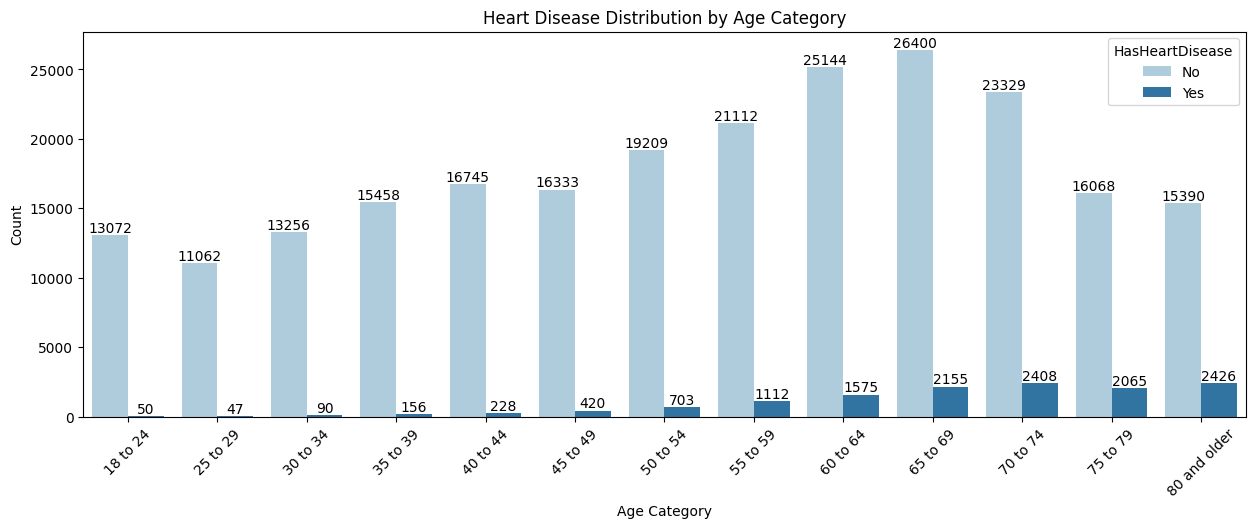

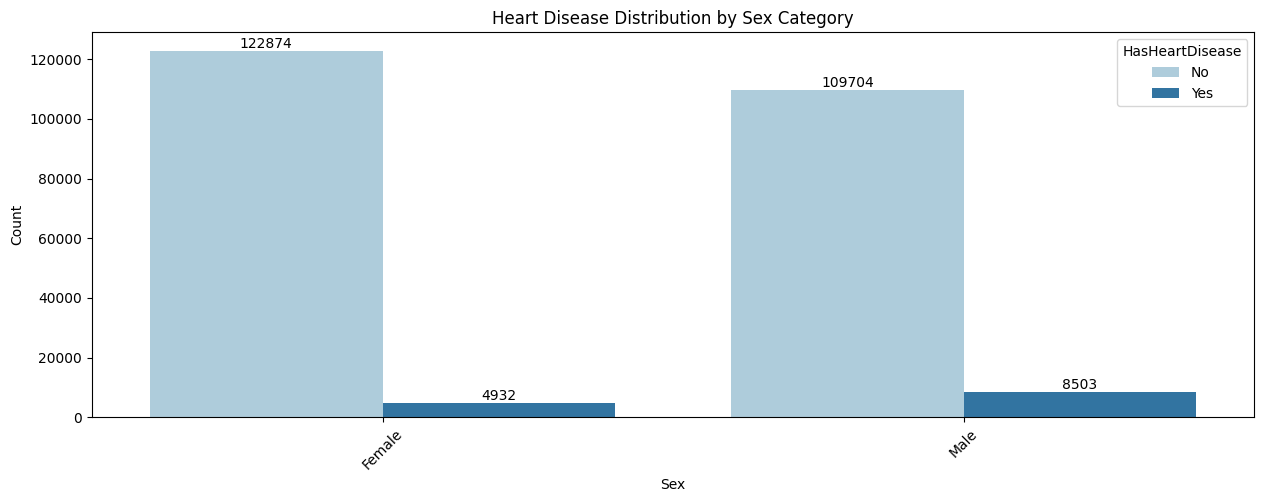

In [ ]:
custom = [
    '18 to 24',
    '25 to 29',
    '30 to 34',
    '35 to 39',
    '40 to 44',
    '45 to 49',
    '50 to 54',
    '55 to 59',
    '60 to 64',
    '65 to 69',
    '70 to 74',
    '75 to 79',
    '80 and older',
]

#Age vs Heart Disease plot
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, 
              x='AgeCategory', 
              hue='HasHeartDisease',
              order=custom,
              palette='Paired')

for container in ax.containers:     # label bar value counts
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Heart Disease Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#Sex vs Heart Disease
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, 
              x='Sex', 
              hue='HasHeartDisease', 
              palette='Paired')

for container in ax.containers:     # label bar value counts
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Heart Disease Distribution by Sex Category')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



### Insights
- Heart disease is more common in older people compared to younger people.
- Heart disease is more common in males despite there being more females in the dataset.

## 4.2 Lifestyle vs Heart Disease

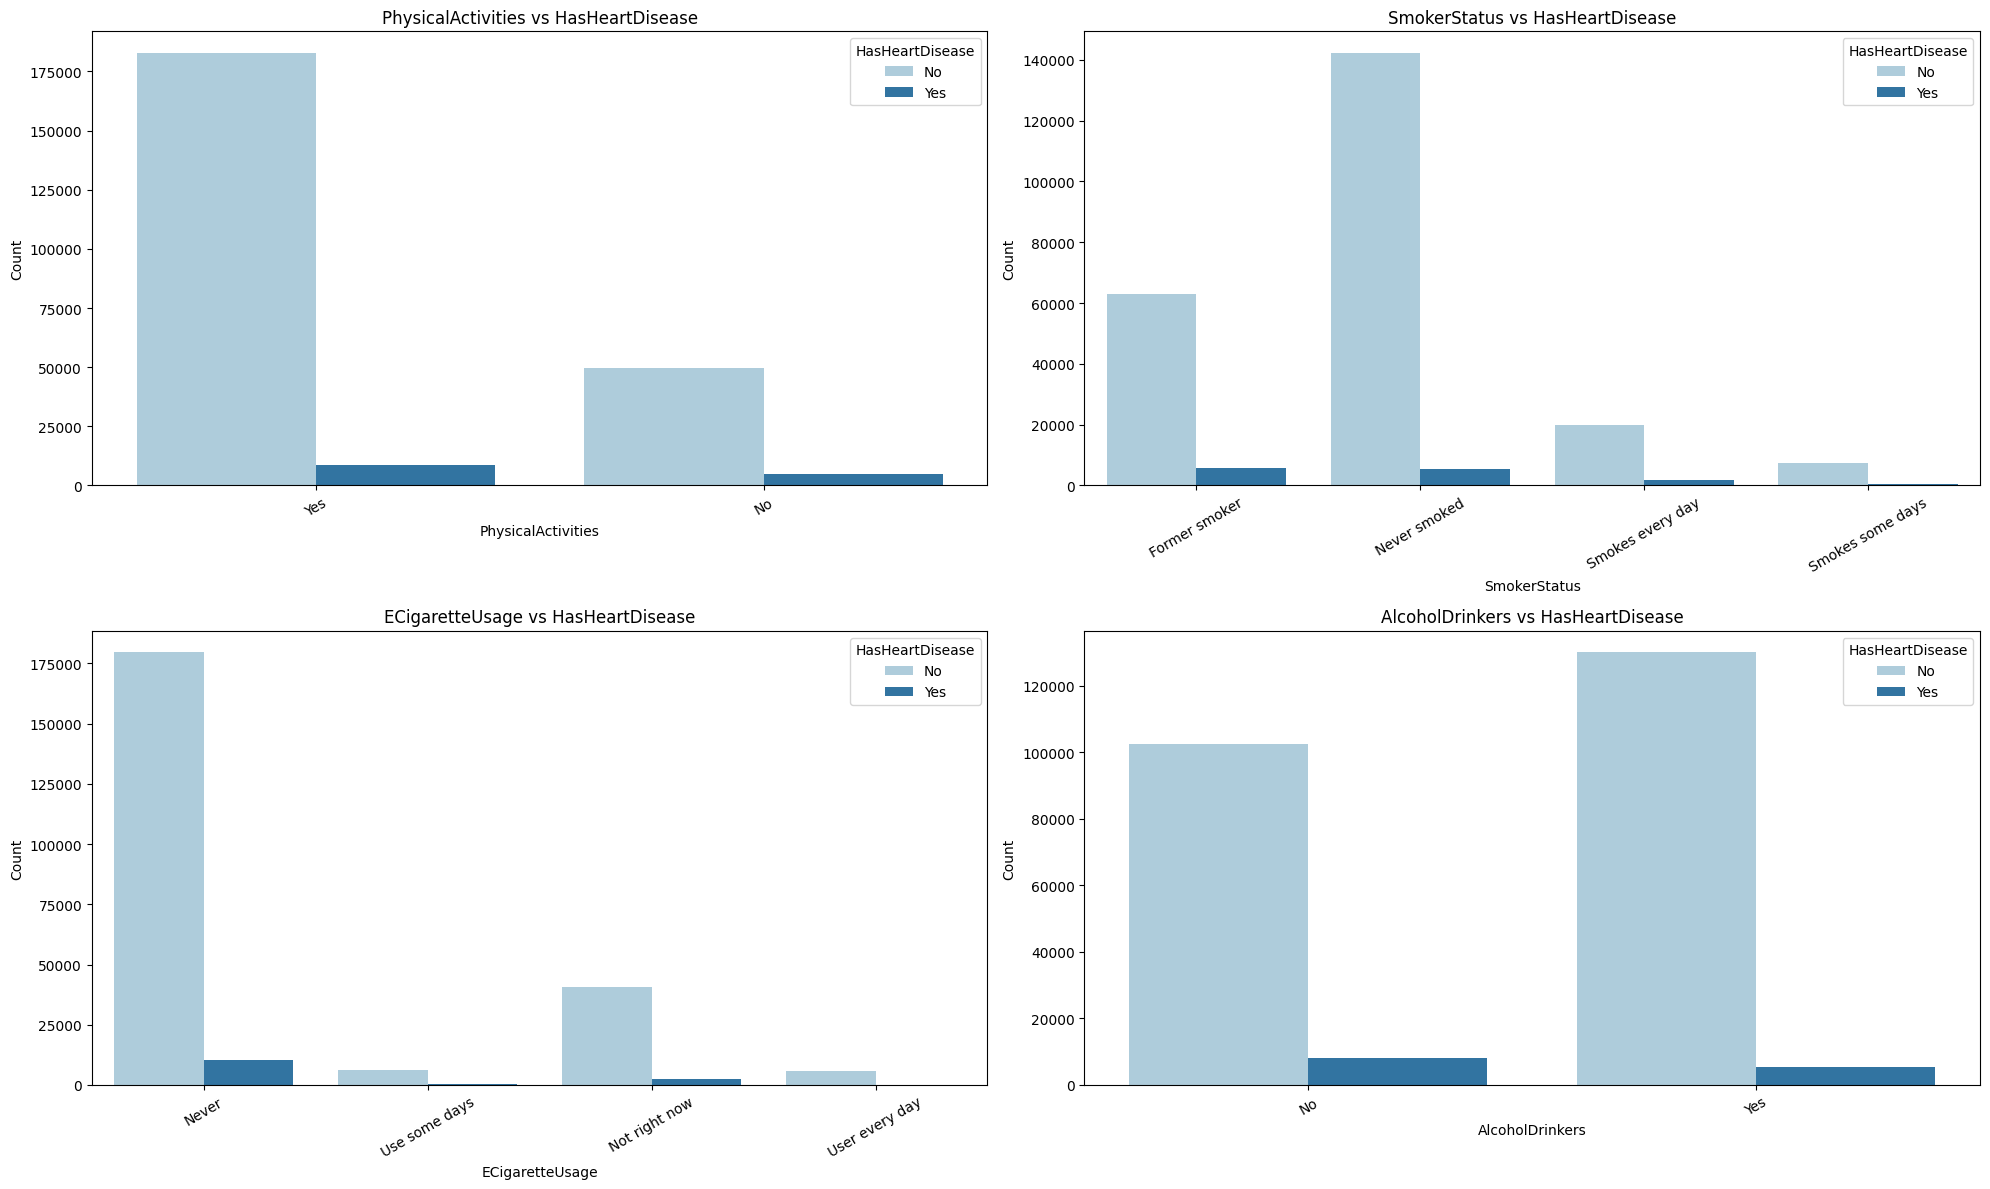

In [37]:
lifestyle_vars = ["PhysicalActivities", "SmokerStatus", "ECigaretteUsage", "AlcoholDrinkers"]
data_cols = df[["PhysicalActivities", "SmokerStatus", "ECigaretteUsage", "AlcoholDrinkers", "HasHeartDisease"]]

fig, axes = plt.subplots(2, 2, figsize=(20, 12))  #2x2 grid
axes = axes.flatten()

for i, col in enumerate(lifestyle_vars):
    sns.countplot(data=data_cols, x=col, hue="HasHeartDisease", ax=axes[i], palette="Paired")
    axes[i].set_title(f"{col} vs HasHeartDisease")
    axes[i].set_ylabel("Count")
    axes[i].legend(title="HasHeartDisease", labels=["No", "Yes"])
    
    # Rotate and shrink x-axis labels
    axes[i].tick_params(axis='x', labelrotation=30)  # rotate 30° and shrink font

plt.tight_layout()
plt.show()


### Insights
- Lifestyle factors show unexpected patterns where healthier choices correspond with higher heart disease rates. This may reflect confounding variables such as age or unintentional data collection bias since there are more people who chose healthier lifestyles than those who did not in the dataset.
- Higher heart disease rates among non-drinkers may reflect that some stopped drinking due to health issues or other confounding factors. More analysis is needed to separate lifelong abstainers from former drinkers and adjust for age and health status.

## 4.3 Health vs Heart Disease

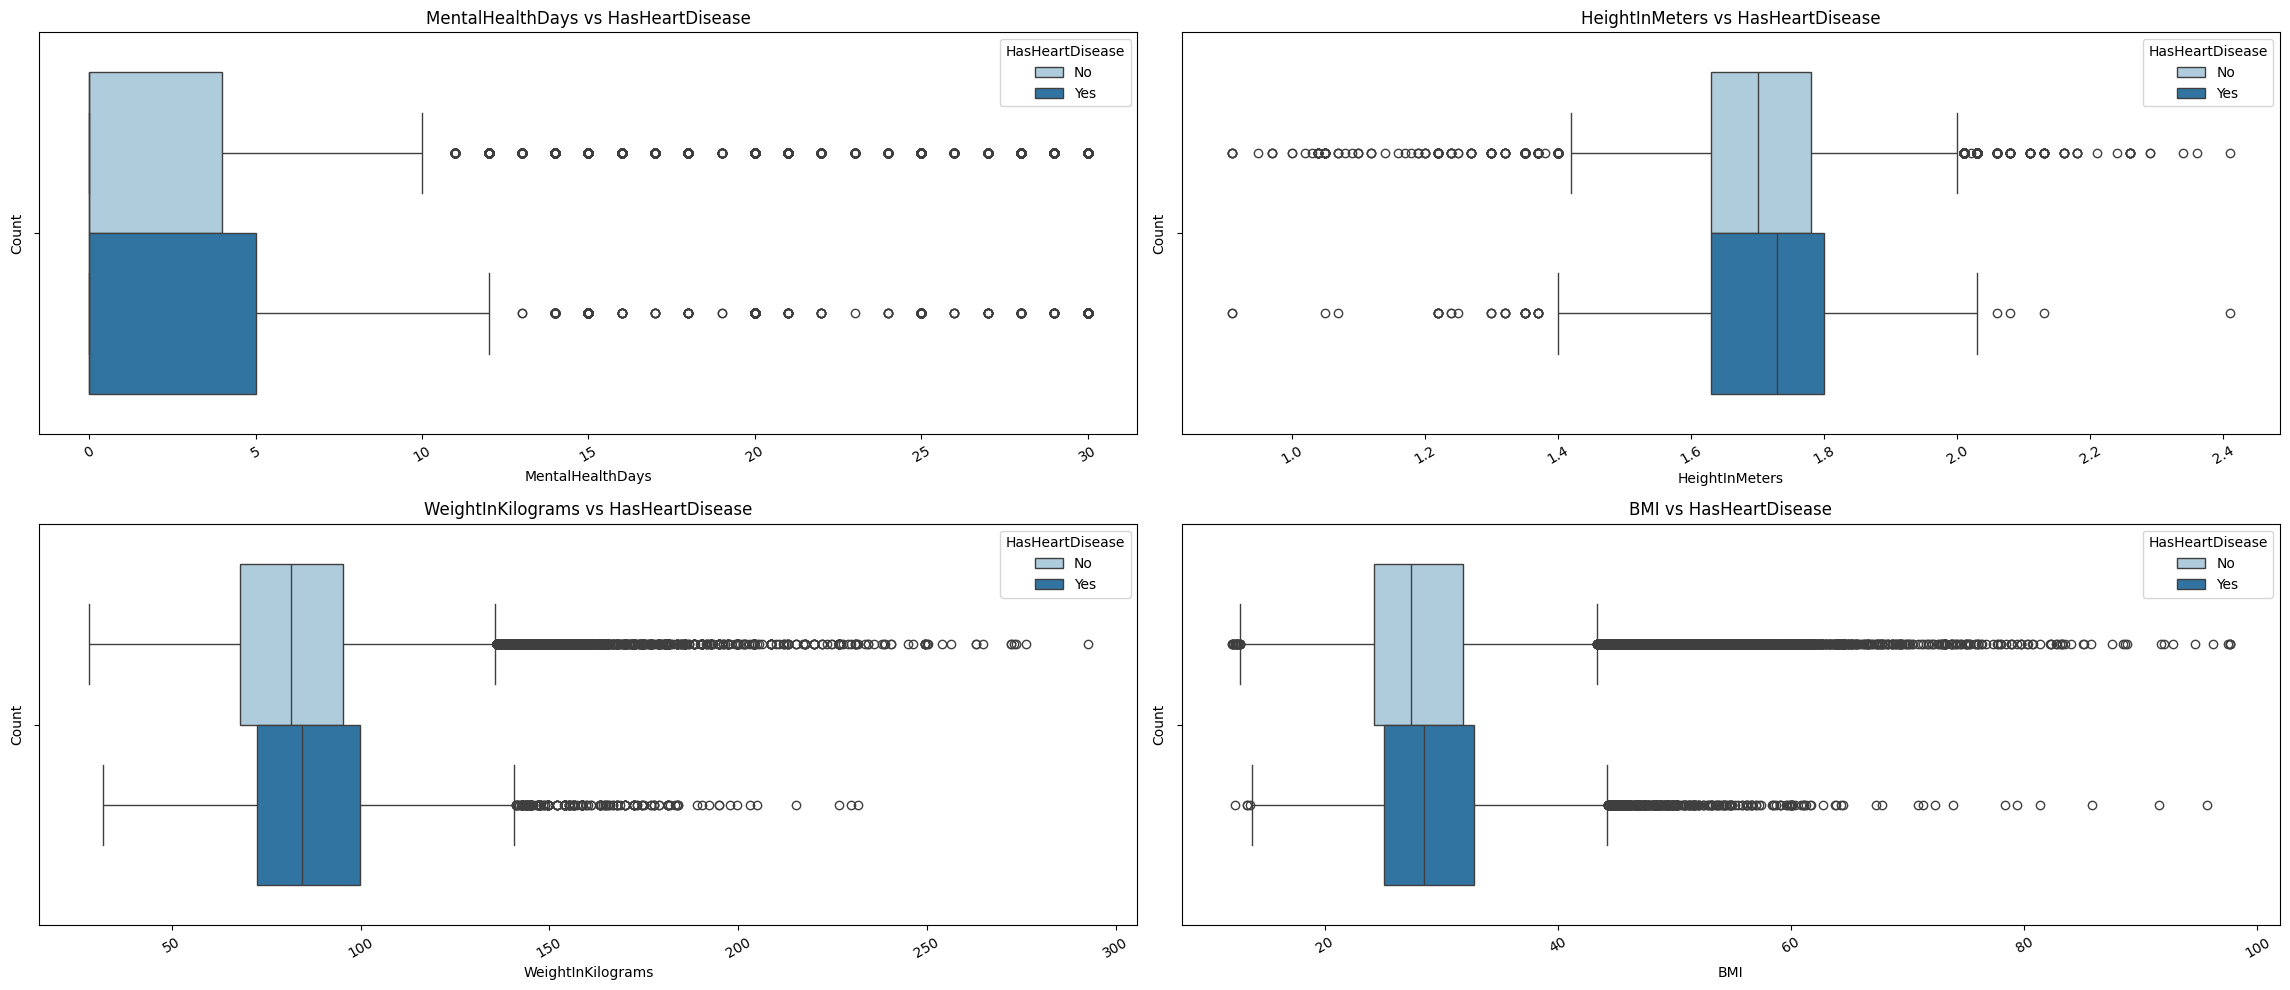

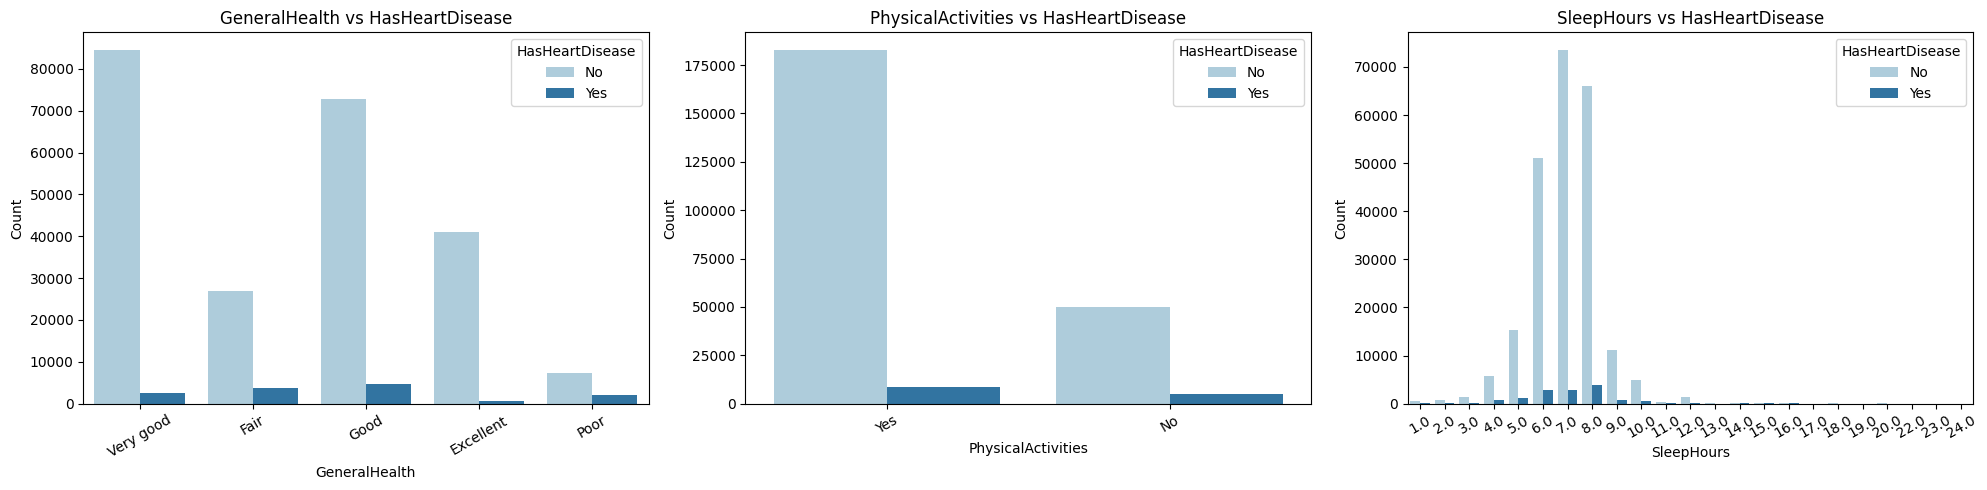

In [59]:
#for box plots
health_vars = ["MentalHealthDays", "HeightInMeters", "WeightInKilograms", "BMI"]
data_cols = df[["MentalHealthDays", "HeightInMeters", "WeightInKilograms", "BMI", "HasHeartDisease"]]

#for bar graph
health2_vars = ["GeneralHealth", "PhysicalActivities", "SleepHours" ]
data_cols2 = df[["GeneralHealth", "PhysicalActivities", "SleepHours", "HasHeartDisease"]]

# # health 1 variables plot
fig, axes = plt.subplots(2, 2, figsize=(23, 10))  
axes = axes.flatten()

for i, col in enumerate(health_vars):
    sns.boxplot(data=data_cols, x=col, hue="HasHeartDisease", ax=axes[i], palette="Paired")
    axes[i].set_title(f"{col} vs HasHeartDisease")
    axes[i].set_ylabel("Count")
    axes[i].legend(title="HasHeartDisease", labels=["No", "Yes"])
    
    # Rotate and shrink x-axis labels
    axes[i].tick_params(axis='x', labelrotation=30)

plt.tight_layout()
plt.show()

#health 2 variablees plot
fig, axes = plt.subplots(1, 3, figsize=(20,5))  #2x2 grid
axes = axes.flatten()
for i, col in enumerate(health2_vars):
    sns.countplot(data=data_cols2, x=col, hue="HasHeartDisease", ax=axes[i], palette="Paired")
    axes[i].set_title(f"{col} vs HasHeartDisease")
    axes[i].set_ylabel("Count")
    axes[i].legend(title="HasHeartDisease", labels=["No", "Yes"])
    
    # Rotate and shrink x-axis labels
    axes[i].tick_params(axis='x', labelrotation=30)  # rotate 30° and shrink font


plt.tight_layout()
plt.show()
